In [43]:
import zipfile, os

zip_path = '/content/test_set.zip'      # this is the file you uploaded
extract_path = '/content/cats_dogs'     # where we’ll extract it

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction done!")
print(os.listdir(extract_path))


✅ Extraction done!
['test_set']


In [44]:
for root, dirs, files in os.walk(extract_path):
    print("Folders inside:", dirs)
    break


Folders inside: ['test_set']


In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data_dir = '/content/cats_dogs/test_set'   # update if needed
categories = ['cats', 'dogs']

data = []
for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)

    for img in os.listdir(path)[:500]:  # take 500 images from each to reduce time
        img_path = os.path.join(path, img)
        try:
            img_arr = cv2.imread(img_path)
            img_arr = cv2.resize(img_arr, (64, 64))
            data.append([img_arr, label])
        except Exception as e:
            pass

print("✅ Images loaded:", len(data))

# Prepare arrays
X, y = [], []
for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0
y = np.array(y)
X = X.reshape(len(X), -1)


✅ Images loaded: 1000


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.52

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.52        96
           1       0.54      0.49      0.52       104

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200


Confusion Matrix:
 [[53 43]
 [53 51]]


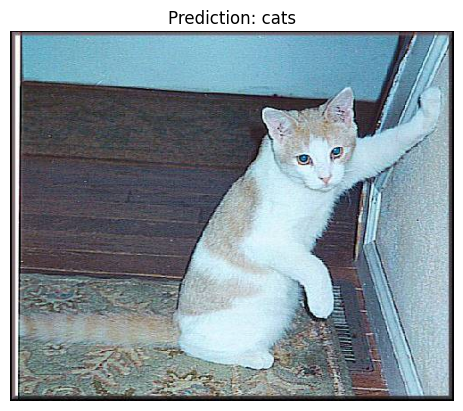

In [47]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64)) / 255.0
    img = img.reshape(1, -1)
    prediction = svm_model.predict(img)
    label = categories[prediction[0]]
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

# Example:
predict_image('/content/cats_dogs/test_set/cats/cat.4001.jpg')
